In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline


learn = tf.contrib.learn
tf.logging.set_verbosity(tf.logging.ERROR)

In [2]:
sess = None
def ResetSession():
    tf.reset_default_graph()
    global sess
    if sess is not None: sess.close()
    sess = tf.InteractiveSession()

In [3]:
#mnist = input_data.read_data_sets('/MNIST_data', one_hot=True)
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting /MNIST_data\train-images-idx3-ubyte.gz
Extracting /MNIST_data\train-labels-idx1-ubyte.gz
Extracting /MNIST_data\t10k-images-idx3-ubyte.gz
Extracting /MNIST_data\t10k-labels-idx1-ubyte.gz


Train, validation, test: 55000, 5000, 10000
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
784


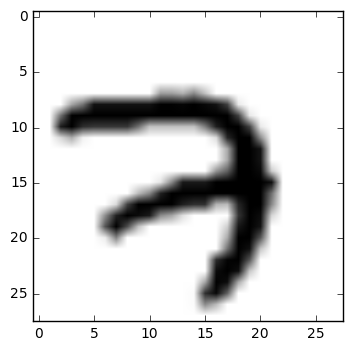

In [4]:
## 1. How many examples do we have?
print ('Train, validation, test: %d, %d, %d' % 
      (len(mnist.train.images), len(mnist.validation.images), len(mnist.test.images)))

## 2. What's the format of a label? Notice they're "one-hot".
print (mnist.train.labels[0])

## 3. What's the format of an image? 
# They're a "flattened" array of 28*28 = 784 pixels.
print (len(mnist.train.images[0]))

## 4. How can you display an image?
plt.imshow(mnist.train.images[0].reshape((28,28)), cmap=plt.cm.gray_r)   
## Note: the first image is oddly drawn.

In [5]:
ResetSession()

NUM_CLASSES = 10
NUM_PIXELS = 28 * 28
TRAIN_STEPS = 1000
BATCH_SIZE = 100
LEARNING_RATE = 0.5

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# Placeholders for images and labels
# The first dimension is the batch size
# None means it can be of any length
# TensorFlow will infer it later
x = tf.placeholder(tf.float32, [None, NUM_PIXELS], name="pixels")
y_ = tf.placeholder(tf.float32, [None, NUM_CLASSES], name="labels")

# Define the model
W = tf.Variable(tf.zeros([NUM_PIXELS, NUM_CLASSES]), name="weights")
b = tf.Variable(tf.zeros([NUM_CLASSES]), name="biases")
y = tf.matmul(x, W) + b

# Write a summary of the graph (before we add the loss and optimizer)
# Which will add a bunch of nodes automatically
sw = tf.train.SummaryWriter('summaries/', graph=tf.get_default_graph())
sw.close()

# Define loss and optimizer
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))
train_step = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)

# Initialize variables after the model is defined
sess.run(tf.initialize_all_variables())

# Train the model
for i in range(TRAIN_STEPS):
    batch_xs, batch_ys = mnist.train.next_batch(BATCH_SIZE)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

# Evaluate the trained model
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
                                  
print("Accuracy %f" % sess.run(accuracy, feed_dict={x: mnist.test.images, 
                                                    y_: mnist.test.labels}))

Extracting /MNIST_data\train-images-idx3-ubyte.gz
Extracting /MNIST_data\train-labels-idx1-ubyte.gz
Extracting /MNIST_data\t10k-images-idx3-ubyte.gz
Extracting /MNIST_data\t10k-labels-idx1-ubyte.gz
Accuracy 0.913700


Predicted: 7, Actual: 7


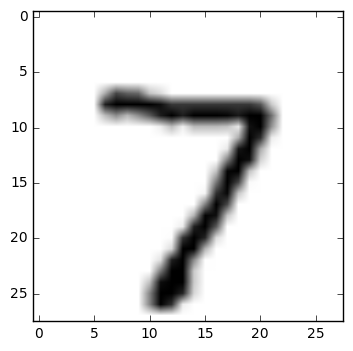

In [6]:
prediction = tf.argmax(y, 1)

def predict(idx):
    image = mnist.test.images[idx]
    return sess.run(prediction, feed_dict={x: [image]})

idx = 0
actual = np.argmax(mnist.test.labels[idx])
print ("Predicted: %d, Actual: %d" % (predict(idx), actual))
plt.imshow(mnist.test.images[idx].reshape((28,28)), cmap=plt.cm.gray_r) 